In [419]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta
from scipy.interpolate import interp1d, interp2d
from scipy.integrate import quad
import lhapdf
import h5py
from scipy.special import beta
from scipy.optimize import brentq

In [420]:
# Weights for deformed pathlength:
beta2 = 0.364
Rmax = 1+beta2*np.sqrt(5/np.pi/16)*2

# randomly sample a path
def Path():
    # randomly get a point in the sphear:
    r=100
    cos=1
    while r>1+beta2*np.sqrt(5/np.pi/16)*(3*cos**2-1):
        r = np.random.rand()**(1./3.)*Rmax
        cos = np.random.rand()*2-1
    phi = np.random.rand()*2*np.pi
    sin = np.sqrt(1-cos**2)
    X0 = r*sin*np.cos(phi)
    Y0 = r*sin*np.sin(phi)
    Z0 = r*cos
    # randomly get a orientation of path length,
    OmegaPhi = np.random.rand()*2*np.pi
    OmegaCos = np.random.rand()*2-1
    OmegaSin = np.sqrt(1-OmegaCos**2)
    Nx = OmegaSin*np.cos(OmegaPhi)
    Ny = OmegaSin*np.sin(OmegaPhi)
    Nz = OmegaCos
    # compute any point on the path to the origin, return D-R(cos)
    def Rt(t):
        X = X0+Nx*t
        Y = Y0+Ny*t
        Z = Z0+Nz*t
        D = np.sqrt(X**2+Y**2+Z**2)
        c2 = Z**2/D**2
        RD = 1+beta2*np.sqrt(5/np.pi/16)*(3*c2-1)
        return D-RD
    return brentq(Rt, 0, 4)
ps = np.array([Path() for i in range(100000)])

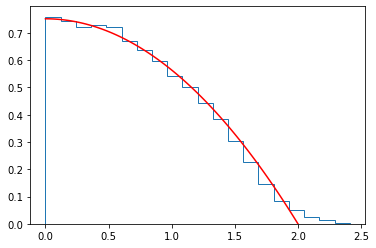

In [421]:
_ = plt.hist(ps, density=True, bins=20, histtype='step')
s = np.linspace(0,2,100)
plt.plot(s, (4-s**2)/(4-s**2).sum()/.02, 'r-')


In [422]:
# Running coupling

Mc = 1.3
Mb = 4.2
Mz = 91.7

CA = 3.
CF = 4./3.
TR = 1./2.

Nf = 3

b0_q = 2./(11.-2./3.*3);
b0_c = 2./(11.-2./3.*4);
b0_b = 2./(11.-2./3.*5);
alphas_Mz_bar = 0.118 / 2. / np.pi;
Lambda2_b = Mz**2/np.exp(b0_b/alphas_Mz_bar);
a5_Mb_bar = b0_b/np.log((2*Mb)**2/Lambda2_b);
Lambda2_c = (2*Mb)**2/np.exp(b0_c/a5_Mb_bar);
a4_Mc_bar = b0_c/np.log((2*Mc)**2/Lambda2_c);
Lambda2_q = (2*Mc)**2/np.exp(b0_q/a4_Mc_bar);
NPscale2 = Lambda2_q * 4.0;

tc = b0_q*np.log(np.log(4*Mc*Mc/Lambda2_q));
tb = b0_c*np.log(np.log(4*Mb*Mb/Lambda2_c))\
   - b0_c*np.log(np.log(4*Mc*Mc/Lambda2_c))\
   + b0_q*np.log(np.log(4*Mc*Mc/Lambda2_q));

In [423]:
# PDF and FF
PDFp = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_p/0")
PDFd = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_A2_Z1/0")
PDFHe = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_A4_Z2/0")
PDFNe = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_A16_Z8/0")
PDFKr = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_A56_Z26/0")
PDFXe = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_A131_Z54/0")
PDFPb = lhapdf.mkPDF("nNNPDF30_nlo_as_0118_A208_Z82/0")
@np.vectorize
def Pp(pid, x, Q2):
    return PDFp.xfxQ2(pid, x, Q2)/x
@np.vectorize
def Pd(pid, x, Q2):
    return PDFd.xfxQ2(pid, x, Q2)/x
@np.vectorize
def PHe(pid, x, Q2):
    return PDFHe.xfxQ2(pid, x, Q2)/x
@np.vectorize
def PNe(pid, x, Q2):
    return PDFNe.xfxQ2(pid, x, Q2)/x
@np.vectorize
def PKr(pid, x, Q2):
    return PDFKr.xfxQ2(pid, x, Q2)/x
@np.vectorize
def PXe(pid, x, Q2):
    return PDFXe.xfxQ2(pid, x, Q2)/x

@np.vectorize
def PPb(pid, x, Q2):
    return PDFPb.xfxQ2(pid, x, Q2)/x



LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/nNNPDF30_nlo_as_0118_p/nNNPDF30_nlo_as_0118_p_0000.dat
nNNPDF30_nlo_as_0118_p PDF set, member #0, version 1; LHAPDF ID = 30020000
LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/nNNPDF30_nlo_as_0118_A2_Z1/nNNPDF30_nlo_as_0118_A2_Z1_0000.dat
nNNPDF30_nlo_as_0118_A2_Z1 PDF set, member #0, version 1; LHAPDF ID = 30020300
LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/nNNPDF30_nlo_as_0118_A4_Z2/nNNPDF30_nlo_as_0118_A4_Z2_0000.dat
nNNPDF30_nlo_as_0118_A4_Z2 PDF set, member #0, version 1; LHAPDF ID = 30020600
LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/nNNPDF30_nlo_as_0118_A16_Z8/nNNPDF30_nlo_as_0118_A16_Z8_0000.dat
nNNPDF30_nlo_as_0118_A16_Z8 PDF set, member #0, version 1; LHAPDF ID = 30022100
LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/nNNPDF30_nlo_as_0118_A56_Z26/nNNPDF30_nlo_as_0118_A56_Z26_0000.dat
nNNPDF30_nlo_as_0118_A56_Z26 PDF set, member #0, version 1; LHAPDF ID = 30023300
LHAPDF 6.4.0 

LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/NNFF10_PIp_lo/NNFF10_PIp_lo_0000.dat
NNFF10_PIp_lo PDF set, member #0, version 1; LHAPDF ID = 2000200
LHAPDF 6.4.0 loading /home/weiyaoke/.local/share/LHAPDF/NNFF10_PIsum_lo/NNFF10_PIsum_lo_0000.dat
NNFF10_PIsum_lo PDF set, member #0, version 1; LHAPDF ID = 2000400


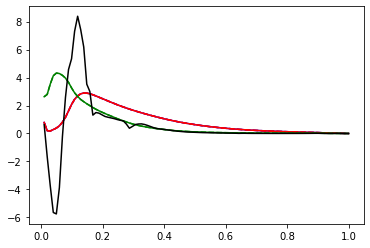

In [474]:
def FF_uubar2pi(z):
    N = 0.387
    a = -0.388
    b = 0.910
    g = 7.15
    d = 3.96
    return z*N*z**a*(1-z)**b*(1+g*(1-z)**d)/(beta(2+a, 1+b) + g*beta(2+a,1+b+d))

def FF_ddbar2pi(z):
    N = 0.388
    a = -0.388
    b = 0.910
    g = 7.15
    d = 3.96
    return z*N*z**a*(1-z)**b*(1+g*(1-z)**d)/(beta(2+a, 1+b) + g*beta(2+a,1+b+d))

def FF_ubar_or_d_2pi(z):
    N = 0.105
    a = 1.649
    b = 3.286
    g = 49.95
    d = 8.67
    return z*N*z**a*(1-z)**b*(1+g*(1-z)**d)/(beta(2+a, 1+b) + g*beta(2+a,1+b+d))

def FF_ssbar2pi(z):
    N = 0.273
    a = 1.449
    b = 3.286
    g = 49.95
    d = 8.67
    return z*N*z**a*(1-z)**b*(1+g*(1-z)**d)/(beta(2+a, 1+b) + g*beta(2+a,1+b+d))

def FF_g2pi(z):
    N = 0.260
    a = 2.552
    b = 6.194
    g = 87.06
    d = 20.36
    return z*N*z**a*(1-z)**b*(1+g*(1-z)**d)/(beta(2+a, 1+b) + g*beta(2+a,1+b+d))


def FFpi0(pid,z,Q0=1):
    if pid==2:
        return FF_uubar2pi(z) - FF_ubar_or_d_2pi(z)
    if pid==-1:
        return FF_ddbar2pi(z) - FF_ubar_or_d_2pi(z)
    if pid==-2 or pid == 1:
        return FF_ubar_or_d_2pi(z)
    if pid==3 or pid==-3:
        return FF_ssbar2pi(z)/2
    if pid==21:
        return FF_g2pi(z)
    

FFpi = lhapdf.mkPDF("NNFF10_PIp_lo")
FFpi0 = lhapdf.mkPDF("NNFF10_PIsum_lo")


x  = np.linspace(.01, .999, 101)
#"""
plt.plot(x, [FFpi0.xfxQ2(2,ix,1) for ix in x],'b-')
plt.plot(x, [FFpi0.xfxQ2(-2,ix,1) for ix in x],'b--')
plt.plot(x, [FFpi0.xfxQ2(1,ix,1) for ix in x],'r-')
plt.plot(x, [FFpi0.xfxQ2(-1,ix,1) for ix in x],'r--')
plt.plot(x, [FFpi0.xfxQ2(3,ix,1) for ix in x],'g-')
plt.plot(x, [FFpi0.xfxQ2(-3,ix,1) for ix in x],'g--')
plt.plot(x, [FFpi0.xfxQ2(21,ix,1) for ix in x],'k-')
#"""
#plt.semilogy()
#plt.semilogx()

In [425]:
# Runge-Kuta-4 for ODE systems
def RK4(t, y, dydt, dt):
    k1 = dydt(t, y)
    k2 = dydt(t+dt/2., y+dt/2.*k1)
    k3 = dydt(t+dt/2., y+dt/2.*k2)
    k4 = dydt(t+dt, y+dt*k3)
    dy = dt/6. * (k1 + k2*2. + k3*2. + k4)
    return y+dy

def RK1(t, y, dydt, dt):
    k1 = dydt(t, y)
    return y+k1*dt

In [426]:
# Vacuum DGLAP kernels

# Pqq
@np.vectorize
def Rqq(x, kt2):
    return CF*(1+x**2)
@np.vectorize
def Dqq(Q2):
    return CF*3./2.
# Pgg
@np.vectorize
def Rgg(x, kt2):
    return 2*CA * x
@np.vectorize
def Agg(x, kt2):
    return 2*CA * ( (1-x)/x + x*(1-x) )
@np.vectorize
def Dgg(Q2):
    return 2*CA * 11./12.
@np.vectorize
def Dgq(Q2):
    return - 1./3.
# Pqg
@np.vectorize
def Pqg(x, kt2):
    return CF * (1+(1-x)**2)/x
# Pqg
@np.vectorize
def Pgq(x, kt2):
    return TR*(x**2+(1-x)**2) 



In [427]:
# scheme-1 R(x)/[(1-x)]_+
# Flavor non singlet: q - qbar
def dF_NS_dt(t, zD):
    #print(zD[0].sum()*dlnx)
    Q2 = Lambda2_q * np.exp(np.exp(t/b0_q))
    kt2 = np.ones_like(xgrid)*Q2
    
    Ni, N = zD.shape
    dydt = np.zeros_like(zD)
    Rgrids = Rqq(xgrid, kt2)
    zover1mz = xgrid/(1-xgrid)
    for k in range(Ni):
        for i in range(N):

            x = xgrid[i]
            S1 = 0.0
            for j in range(i,N):
                S1 += (zD[k,N-1-j+i]*Rgrids[j] - zD[k,i]*Rgrids[N-1]) * zover1mz[j] * dlnx
            dydt[k,i] += S1

            S2 = 0.0
            for j in range(i):
                S2 +=  zover1mz[j] * dlnx
            dydt[k,i] -= S2 * zD[k,i]*Rgrids[N-1]
            dydt[k,i] += Dqq(Q2)*zD[k,i]
    return -dydt

# Coupled flavor singlet
def dF_S_dt(t, zD):
    Q2 = Lambda2_q * np.exp(np.exp(t/b0_q))
    kt2 = np.ones_like(xgrid)*Q2
    zG = zD[0]
    zQs = zD[1:]
    Nf = zQs.shape[0]
    N = zG.size
    dydt = np.zeros_like(zD)
    zover1mz = xgrid/(1-xgrid)
    
    # Gluon part
    Rgrids = Rgg(xgrid, kt2)
    Agrids = Agg(xgrid, kt2)
    Pgrids = Pqg(xgrid, kt2)
    for i in range(N):
        x = xgrid[i]
        # From g->g
        S1 = 0.0
        for j in range(i,N-1):
            S1 += (zG[N-1-j+i]*Rgrids[j] - zG[i]*Rgrids[N-1]) * zover1mz[j]
        dydt[0,i] += S1 * dlnx
        S2 = 0.0
        for j in range(i):
            S2 +=  zover1mz[j]
        dydt[0,i] -= S2 * dlnx * zG[i]*Rgrids[N-1]
        for j in range(i,N):
            dydt[0,i] += zG[N-1-j+i]*Agrids[j]*xgrid[j] * dlnx
        dydt[0,i] += (Dgg(Q2)+Nf*Dgq(Q2))*zG[i]
        # From q -> q + g
        for j in range(i,N):
            dydt[0,i] += np.sum([zQs[iq][N-1-j+i] for iq in range(Nf)])*Pgrids[j]*xgrid[j] * dlnx
          
    # q+qbar part
    Rgrids = Rqq(xgrid, kt2)
    Pgrids = Pgq(xgrid, kt2)
    for iq in range(Nf):
        for i in range(N):        
            S1 = 0.0
            for j in range(i,N-1):
                S1 += (zQs[iq,N-1-j+i]*Rgrids[j] - zQs[iq,i]*Rgrids[N-1]) * zover1mz[j]
            dydt[1+iq,i] += S1 * dlnx
            S2 = 0.0
            for j in range(i):
                S2 +=  zover1mz[j]
            dydt[1+iq,i] -= S2 * dlnx * zQs[iq,i]*Rgrids[N-1]
            dydt[1+iq,i] += Dqq(Q2)*zQs[iq,i]
            # From g->qqbar
            for j in range(i,N):
                dydt[1+iq,i] += 2*zG[N-1-j+i]*Pgrids[j]*xgrid[j] * dlnx
    return -dydt

In [428]:
# In-medium RG equation

af = 2*CF*2*CA 
bf = 2*CF*(2*CA+CF)
cf = CF

ag = 2*CA*2*CA
bg = 2*CF*Nf
cg = 2*CF**2

############# Naive solver, to be used with RK4
def FiniteDiff(f,dx):
    dfdx = np.zeros_like(f)
    
    for i in range(1, len(f)-1):
        dfdx[i] = (f[i+1]-f[i-1])/2/dx
    dfdx[-1] = 0
    dfdx[0] = dfdx[1]
    return dfdx

def Rate_NS(t, Y):
    dYdt = np.zeros_like(Y) 
    dYdy = np.zeros_like(Y)
     
    Nv = Y.shape[0]
    for k in range(Nv):
        dYdy[k] = FiniteDiff(Y[k],dy) 
        dYdt[k] = (af*dYdy[k] - bf*Y[k])/(1+af*t)
    return dYdt
    
def Rate_S(t, Y):
    dYdt = np.zeros_like(Y) 
    dYdy = np.zeros_like(Y)
     
    for k in range(len(Y)):
        dYdy[k] = FiniteDiff(Y[k],dy) 
    # 
    for k in range(Nf):
        dYdt[1+k] = (af*dYdy[1+k] - bf*Y[1+k] + cf*Y[0])/(1+af*t)
    dYdt[0] = (ag*dYdy[0] - bg*Y[0] + cg*np.sum([Y[1+k] for k in range(Nf)], axis=0)
              )/(1+ag*t)
    return dYdt

########## Fancy flux limiter solver
def Compute_fluc(F, C):
    flux = np.zeros_like(F)
    Nx = len(F)
    for i in range(Nx-2):
        Fp = F[i+2]-F[i+1]
        Fm = F[i+1]-F[i]
        Fpp = F[(i+3)%Nx]-F[i+2]
        
        Rm = (Fp+1e-15)/(Fm+1e-15)
        Lm = (Rm+np.abs(Rm))/(1+np.abs(Rm))
        
        Rp = (Fpp+1e-15)/(Fp+1e-15)
        Lp = (Rp+np.abs(Rp))/(1+np.abs(Rp))
        
        flux[i+1] = C * Fp - .5*C*(1-C)*(Lp-Lm/Rm)*Fp 
        #flux[i+1] = .5*C*(F[i+2]-F[i]) + .5*C**2*(F[i+2]-2*F[i+1]+F[i])
    flux[-1] = 0
    flux[0] = 0
    return flux

def DeltaY_NS(dt, t, dy, Y):
    flux = np.zeros_like(Y) 
    dY = np.zeros_like(Y)
    for k in range(Y.shape[0]):
        flux[k] = Compute_fluc(Y[k], af*dt/dy)
        dY[k] = (flux[k] - bf*Y[k]*dt)/(1+af*t)
    return dY  

def DeltaY_S(dt, t, dy, Y):
    flux = np.zeros_like(Y) 
    dY = np.zeros_like(Y)
     
    for k in range(len(Y)):
        if k==0:
            flux[k] = Compute_fluc(Y[k], ag*dt/dy)
        else:
            flux[k] = Compute_fluc(Y[k], af*dt/dy)
    # 
    for k in range(Nf):

        dY[1+k] = (flux[1+k] - dt*bf*Y[1+k] + dt*cf*Y[0])/(1+af*t)
    dY[0] = (flux[0] - dt*bg*Y[0] + dt*cg*np.sum([Y[1+k] for k in range(Nf)], axis=0) )/(1+ag*t)
    return dY

In [429]:
# Vacuum Grid
Nx = 200
lnxgrid = np.linspace(np.log(0.02),np.log(.9999),Nx)
xgrid = np.exp(lnxgrid)
dlnx = lnxgrid[1]-lnxgrid[0]

In [505]:
# DIS setting
Mp = 0.938
Be =  10*100/Mp#27.6# 
BA = Mp*1.
PA = np.sqrt(BA**2-Mp**2)


sqrts = np.sqrt(Mp**2 + 2*Be*(BA+PA) )

Ee = (sqrts**2-Mp**2)/(2*Mp)
print("sqrt{s} = ", sqrts, "Ee = ", Ee)
Q2min = 1.0
Q2max = 20.0#
xB = 0.5
yavg = Q2max/2/0.938/Ee/xB
print("y =", yavg, "E0=", Ee*yavg)

sqrt{s} =  44.731195423328444 Ee =  1066.098081023454
y = 0.020000000000000007 E0= 21.321961620469086


In [506]:
# IC
sigma_z = 0.03
Shift = 1 - 3*sigma_z

alpha_em = 1/137
HardCoeff = 2*np.pi*alpha_em**2/Q2max**4 * (1+(1-yavg)**2)

#used as normalization
def DIS(PDF):
    uubar = (PDF(2,xB,Q2max) + PDF(-2,xB,Q2max)) 
    ddbar = (PDF(1,xB,Q2max) + PDF(-1,xB,Q2max)) 
    ssbar =  (PDF(3,xB,Q2max) + PDF(-3,xB,Q2max)) 
    return HardCoeff * (uubar*4/9 + ddbar*1/9 + ssbar*1/9)

def PrepareSpectraIC(PDF):
    smear = np.exp(-(xgrid-Shift)**2/sigma_z**2)
    uv0 = (PDF(2,xB,Q2max) - PDF(-2,xB,Q2max)) * 4/9
    dv0 = (PDF(1,xB,Q2max) - PDF(-1,xB,Q2max)) * 1/9 
    G0 = 0.
    u0 =  (PDF(2,xB,Q2max) + PDF(-2,xB,Q2max)) * 4/9 
    d0 =  (PDF(1,xB,Q2max) + PDF(-1,xB,Q2max)) * 1/9 
    s0 =  (PDF(3,xB,Q2max) + PDF(-3,xB,Q2max)) * 1/9 
    F0 = np.array([G0, u0, d0, s0, uv0, dv0])
    return xgrid*np.outer(F0, smear*xgrid) * HardCoeff / DIS(PDF)
 


In [507]:
Nucl='Pb'
Anumber = 208

In [508]:
tmin = b0_q*np.log(np.log(Q2max/Lambda2_q))
tmax = b0_q*np.log(np.log(Q2min/Lambda2_q))
Nt = 10
dt = (tmax-tmin)/Nt
Q20 = Q2min*1.
Ts = np.linspace(tmin, tmax, Nt)
Q2s =  Lambda2_q*np.exp(np.exp(Ts/b0_q))

FQA = [PrepareSpectraIC(PPb)]
FQd = [PrepareSpectraIC(Pp)]
t = tmin*1
for t in Ts:
    print(t)
    FQA.append(np.array([*RK4(t, FQA[-1][:(Nf+1)], dF_S_dt, dt), *RK4(t, FQA[-1][(Nf+1):], dF_NS_dt, dt) ]) )
    FQd.append(np.array([*RK4(t, FQd[-1][:(Nf+1)], dF_S_dt, dt), *RK4(t, FQd[-1][(Nf+1):], dF_NS_dt, dt) ]) )


/home/weiyaoke/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: divide by zero encountered in PPb (vectorized)
  outputs = ufunc(*inputs)
/home/weiyaoke/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: divide by zero encountered in Pp (vectorized)
  outputs = ufunc(*inputs)


0.42180651058152585
0.40709414419781326
0.39238177781410066
0.37766941143038807
0.3629570450466755
0.3482446786629629
0.3335323122792503
0.3188199458955377
0.3041075795118251
0.2893952131281125


In [509]:
FQA = np.array(FQA) # Q2, ch, x
FQd = np.array(FQd) # Q2, ch, x

# Interpolate the solution at the final scale
F1 = []
for iF in FQA[-1]:
    F1.append(interp1d(lnxgrid, iF, fill_value=0, kind='cubic', bounds_error=False))
    
F1d = []
for iFd in FQd[-1]:
    F1d.append(interp1d(lnxgrid, iFd, fill_value=0, kind='cubic', bounds_error=False))

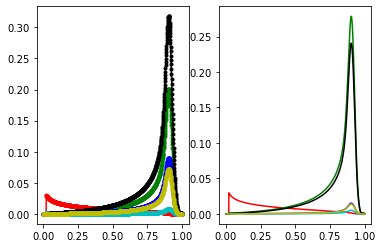

In [510]:
plt.subplot(1,2,1)

XXX = np.linspace(1e-3,1-1e-3,1000)

for iF, iFp, c in zip(F1, F1d, 'rgbcky'):
    #plt.plot(np.log(XXX/(1-XXX)), iF(np.log(XXX)), '.-', color=c)
    plt.subplot(1,2,1)
    plt.plot(XXX, iF(np.log(XXX)), '.-', color=c)
    plt.subplot(1,2,2)
    plt.plot(XXX, iFp(np.log(XXX)), '-', color=c)

0.5147578171167962


/tmp/ipykernel_1076506/719915248.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = quad(df, 0, x)[0]*4/np.pi/BB(x) + np.euler_gamma*(1/BB(x)-1)


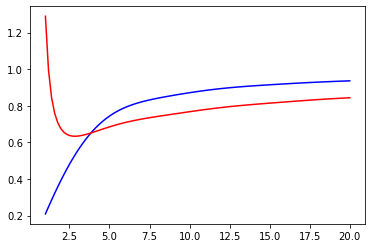

In [511]:
from scipy.special import sici
x = np.linspace(1,20,100)

@np.vectorize
def BB(x):
    si, ci = sici(x)
    return 4/np.pi*(x**2*si+np.sin(x) + x*(np.cos(x)-2))/2/x**2

@np.vectorize
def Chi(x):
    def df(w):
        return (1-np.sin(w)/w)/w**2*np.log(w)
    K = quad(df, 0, x)[0]*4/np.pi/BB(x) + np.euler_gamma*(1/BB(x)-1)
    return 2*np.exp(K)

plt.plot(x, BB(x),'b-')
plt.plot(x, Chi(x)/2/np.exp(1.5-np.euler_gamma),'r-')
print(0.01*Q2max*2*1.2*131**0.333*5.076/2/12)
#plt.ylim(0,1)

In [533]:
rhoref = 0.36/5.076**3
Rref = 1.2*Anumber**(1./3.)*5.076
Lmax = 2*Rref
rho = rhoref*1.0

La2 = Lambda2_q*1.
m2 = 0.12
E = Ee*yavg/Shift
print(E, Shift)
def qhat(E):
    def df(q2):
        return 4*np.pi/9/np.log(np.min([La2*np.e,q2])/La2) * CF * q2/(q2+m2)**2 * rho * 5.076
    return quad(df, 0, E*m2**.5/2)[0]
qhat(12)

23.430727055460533 0.91


/tmp/ipykernel_1076506/62265678.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(df, 0, E*m2**.5/2)[0]


0.0475887692729608

/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.05 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.15 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.25 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.35 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.45 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.55 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.65 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.75 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.85 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(df, 0, E*m2**.5/2)[0]


0.95 23.430727055460533 0.10071341266926376


/tmp/ipykernel_1076506/2262810342.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0]
/tmp/ipykernel_1076506/2262810342.py:94: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0]


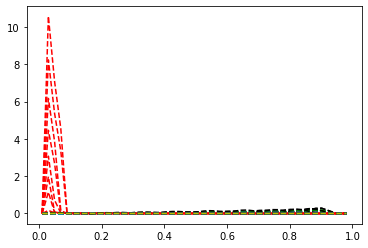

In [515]:
# Medium part
Lps = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 
                0.55, 0.65, 0.75, 0.85, 0.95])
for Lp in Lps:
    print(Lp, E, qhat(E))

    L = Lmax * Lp

    
    Nz = 200
    y = np.linspace(np.log(.02), np.log(1), Nz)
    dy = y[1]-y[0]
    z = np.exp(y)
    dtau = dy/ag


    # Compute matching coefficient
    def p45(x):
        return CF*(1+x**2) * (CA+CA*x**2+(1-x)**2*(2*CF-CA))
    def p123(x):
        return CF*(1+x**2) * (CA+CA*x**2+(1-x)**2*(2*CF-CA))
    def p0(x):
        return CA*(1+x**4+(1-x)**4) * (CA+CA*x**2+(1-x)**2*CA)
    def dp0(x):
        return 12*CA**2*(2*x-1)*(x**2-x+1)**2
    def c_qg(x):
        return CF*(1+(1-x)**2) * (CA+(1-x)**2*CA + x**2*(2*CF-CA))
    def c_gq(x):
        return TR*(x**2+(1-x)**2) * (CA*x**2+(1-x)**2*CA + (2*CF-CA))
    xl,xh = .05, .95
    def FO_NLO(z, it, FF):
        Res = np.zeros(6)
        Finalscale = np.max([Chi(Q2max*L/2/yavg/Ee) * z*E/L, m2])
        Amu2 = (4*np.pi/9/np.log(Finalscale/La2))**2 \
             * rho*L**2/8/E * BB(Q2max*L/2/yavg/Ee)
        B = FF(z)/z
        dFdz1 = (FF(z+.005)-FF(z-.005))/.01

        if it in [4,5]:
            def G1_2(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p45(x)*(A-B) - (x-1)*p45(1)*(B-dFdz1)
                return res

            def G1_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p45(x)*(A-B)
                return res

            def G0_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p45(x)*(A-B) - p45(0)*(0.-B)
                return res

            Res[it] = Amu2* ( 
                    quad(lambda x: G1_2(x)/(1-x)**2,xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G1_1(x)/(1-x),xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0] 
                  + CF*(4*CA-CF)*B )

        if it in [1,2,3]:
            def G1_2(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p45(x)*(A-B) - (x-1)*p45(1)*(B-dFdz1)
                return res

            def G1_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p45(x)*(A-B)
                return res

            def G0_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p45(x)*(A-B) - p45(0)*(0.-B)
                return res
            Res[it] = Amu2* ( 
                    quad(lambda x: G1_2(x)/(1-x)**2,xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G1_1(x)/(1-x),xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0] 
                  + CF*(4*CA-CF)*B )

            def G0_2(x):
                return c_qg(x)*x/z*FF(z/x) if x>z else 0.

            def G0_1(x):
                return c_qg(x)*x/z*FF(z/x) if x>z else 0.

            def G1_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  c_qg(x)*(A-B)
                return res
            Res[0] = Amu2* ( 
                    quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G1_1(x)/(1-x),xl,xh,epsrel=.05)[0] 
                  - 3*CF**2*B )

        if it == 0:
            def G1_2(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p0(x)*(A-B) - (x-1)*p0(1)*(B-dFdz1)
                return res

            def G1_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  2*p0(x)*(A-B)
                return res

            def G0_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  2*p0(x)*(A-B) - 2*p0(0)*(0.-B)
                return res

            def G0_2(x):
                A = x/z*FF(z/x) if x>z else 0.
                res =  p0(x)*(A-B) - p0(0)*(0.-B) - x*dp0(0)*(0.-B)
                return res

            def C1_1(x):
                return c_gq(x)-c_gq(1)

            def C0_1(x):
                return c_gq(x)-c_gq(0)

            Res[it] = Amu2* ( 
                    quad(lambda x: G1_2(x)/(1-x)**2,xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G1_1(x)/(1-x),xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G0_1(x)/x,xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: G0_2(x)/x**2,xl,xh,epsrel=.05)[0] 
                  + 14*CA**2*B 
                  - Nf*B*( quad(lambda x: C1_1(x)/(1-x),xl,xh,epsrel=.05)[0]
                         + quad(lambda x: C0_1(x)/x,xl,xh,epsrel=.05)[0])
                  )

            def C1_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                return c_gq(x)*A-c_gq(1)*B

            def C0_1(x):
                A = x/z*FF(z/x) if x>z else 0.
                return c_gq(x)*A

            dQ = Amu2* ( 
                  + quad(lambda x: C1_1(x)/(1-x),xl,xh,epsrel=.05)[0] 
                  + quad(lambda x: C0_1(x)/x,xl,xh,epsrel=.05)[0] 
                  )
            Res[1] = dQ
            Res[2] = dQ
            Res[3] = dQ
        return Res


    # The fixed order contribution:
    ZFO = 1.-np.exp(-np.linspace(.01, np.log(1/0.001),100))
    Fmed_fixed_order_data = np.zeros([len(ZFO),6])
    Fmed_fixed_order = []
    for it in [0,1,2,3,4,5]:
        iF1 = interp1d(xgrid, FQA[-1][it], fill_value=0, kind='cubic', bounds_error=False)
        dY = np.array([FO_NLO(zzz, it, iF1) for zzz in ZFO])
        Fmed_fixed_order_data += dY
    for it in [0,1,2,3,4,5]:    
        Fmed_fixed_order.append(interp1d(ZFO, Fmed_fixed_order_data[:,it], 
                                         fill_value=0., kind='cubic', bounds_error=False)
                               )

    Tmax = np.pi/9*rho*L**2/2/E*4*np.pi/9*1/np.log(m2/La2)*10*E/L/m2 * BB(Q2max*L/2/yavg/Ee)
    Ts = np.arange(int(Tmax/dtau))*dtau
    Zgrid = np.linspace(.01,.9999,1000)
    FinalScale = np.max([Chi(Q2max*L/2/yavg/Ee)*Zgrid*E/L, m2*Zgrid**0], axis=0)
    Tauy = -np.pi/9*rho*L**2/2/E*BB(Q2max*L/2/yavg/Ee) \
          * (4*np.pi/9/np.log(FinalScale/La2) - 4*np.pi/9/np.log(m2/La2))
    Ty = Tauy/Zgrid
    # RG only, start with vacuum initial condition
    Fmed = [ np.array([F1[iv](y) for iv in range(6)]) ]
    for it in Ts:
        # flux limiter solver, better than RK4 near shock boundary
        iF = np.concatenate([Fmed[-1][:Nf+1] + DeltaY_S(dtau, it, dy, Fmed[-1][:Nf+1]),
                             Fmed[-1][Nf+1:] + DeltaY_NS(dtau, it, dy, Fmed[-1][Nf+1:])], axis=0)
        Fmed.append(iF)
    Fmed = np.array(Fmed)
    F2 = []
    for i in range(6):
        F2.append(interp2d(y, Ts, Fmed[1:,i], fill_value=0))
    # RG only interpolate to the right evolution boundary mu^2 = Chi()*z*E/L
    zF2RG = []
    for iF, c in zip(F2, 'rgbcky'):
        RG = np.array([iF(iy, iTy)[0] for iy, iTy in zip(np.log(Zgrid), Ty)])
        zF2RG.append(RG)        
        plt.plot(Zgrid[::20], RG[::20], '--', color=c)
        
    # RG with initial conditon + FO
    Fmed = [ np.array([F1[iv](y)+ Fmed_fixed_order[iv](z) for iv in range(6)]) ]
    for it in Ts:
        # flux limiter solver, better than RK4 near shock boundary
        iF = np.concatenate([Fmed[-1][:Nf+1] + DeltaY_S(dtau, it, dy, Fmed[-1][:Nf+1]),
                             Fmed[-1][Nf+1:] + DeltaY_NS(dtau, it, dy, Fmed[-1][Nf+1:])], axis=0)
        Fmed.append(iF)
    Fmed = np.array(Fmed)
    F2 = []
    for i in range(6):
        F2.append(interp2d(y, Ts, Fmed[1:,i], fill_value=0))
    # RG only interpolate to the right evolution boundary mu^2 = Chi()*z*E/L
    zF2Full = []
    for iF, c in zip(F2, 'rgbcky'):
        Full = np.array([iF(iy, iTy)[0] for iy, iTy in zip(np.log(Zgrid), Ty)])
        zF2Full.append(Full)        
        plt.plot(Zgrid[::20], Full[::20], '--', color=c)

    

    # interpolate the final spectra
    zFmedFull = {
    21: interp1d(Zgrid,zF2Full[0],fill_value=0., bounds_error=False, kind='cubic'),
    2: interp1d(Zgrid,(zF2Full[1]+zF2Full[1+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -2: interp1d(Zgrid,(zF2Full[1]-zF2Full[1+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    1: interp1d(Zgrid,(zF2Full[2]+zF2Full[2+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -1: interp1d(Zgrid,(zF2Full[2]-zF2Full[2+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    3: interp1d(Zgrid, zF2Full[3]/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -3: interp1d(Zgrid, zF2Full[3]/2.,fill_value=0., bounds_error=False, kind='cubic'),
    }

    zFmedRG = {
    21: interp1d(Zgrid,zF2RG[0],fill_value=0., bounds_error=False, kind='cubic'),
    2: interp1d(Zgrid,(zF2RG[1]+zF2RG[1+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -2: interp1d(Zgrid,(zF2RG[1]-zF2RG[1+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    1: interp1d(Zgrid,(zF2RG[2]+zF2RG[2+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -1: interp1d(Zgrid,(zF2RG[2]-zF2RG[2+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    3: interp1d(Zgrid, zF2RG[3]/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -3: interp1d(Zgrid, zF2RG[3]/2.,fill_value=0., bounds_error=False, kind='cubic'),
    }

    zFvac = {
    21: interp1d(xgrid,FQd[-1][0],fill_value=0., bounds_error=False, kind='cubic'),
    2: interp1d(xgrid,(FQd[-1][1]+FQd[-1][1+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -2: interp1d(xgrid,(FQd[-1][1]-FQd[-1][1+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    1: interp1d(xgrid,(FQd[-1][2]+FQd[-1][2+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -1: interp1d(xgrid,(FQd[-1][2]-FQd[-1][2+Nf])/2.,fill_value=0., bounds_error=False, kind='cubic'),
    3: interp1d(xgrid, FQd[-1][3]/2.,fill_value=0., bounds_error=False, kind='cubic'),
    -3: interp1d(xgrid, FQd[-1][3]/2.,fill_value=0., bounds_error=False, kind='cubic'),
    }


    @np.vectorize
    def F2pi(zh, Spectra):
        def df(lnx):
            x = np.exp(lnx)
            res = 0.
            for pid in [21,1,2,3,-1,-2,-3]:
                res += Spectra[pid](x) * FFpi0.xfxQ2(pid, zh/x, Q20) 
            return res
        return quad(df, np.log(zh), np.log(1), epsrel=.04)[0]

    zh = np.linspace(.05, .99, 101)
    zdNdz_pi_medFull = F2pi(zh, zFmedFull)
    zdNdz_pi_medRG = F2pi(zh, zFmedRG)
    zdNdz_pi_vac = F2pi(zh, zFvac)

    with open("rho1d5/res-{}-Qsq20-x0d5-Lp{}.dat".format(Nucl,Lp),'w') as f:
    #with open("rho0d67/res-{}-Lp{}.dat".format(Nucl,Lp),'w') as f:
        for i1, i2, i3, i4, i5 in zip(zh, zdNdz_pi_medRG, zdNdz_pi_vac, zdNdz_pi_medFull, zdNdz_pi_vac):
            f.write("{:1.4f}\t{:1.4e}\t{:1.4e}\t{:1.4e}\t{:1.4e}\n".format(i1,i2,i3,i4,i5))




In [526]:
qhat(12)

/tmp/ipykernel_1076506/3471315639.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(df, 0, E*m2**.5/2)[0]


0.07138315398125648

/tmp/ipykernel_1076506/2390412675.py:76: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


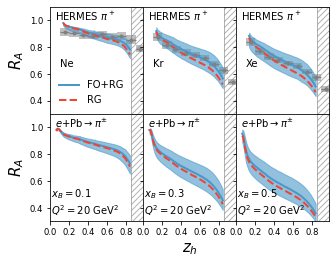

In [522]:

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(4.5,3.5), sharex=True, sharey=True)
def plotE(GG,c,ax,mfc='none'):
    z,zl,zh,RA,stat,_,sys,_ = np.loadtxt("../TMDPDF/HERMES/e{}-pi+.dat".format(GG), skiprows=12,delimiter=',').T
    ax.errorbar(z,RA,xerr=[z-zl, zh-z], yerr=stat, fmt='.', lw=1.2,
                color=c)
    for xl, xh, yl, yh in zip(zl, zh, RA-sys, RA+sys):
        ax.fill_between([xl,xh],[yl,yl],[yh,yh],edgecolor='none',facecolor=c, alpha=.5)

ccr, ccg, ccb = plt.cm.Reds(.6), plt.cm.Greens(.6), plt.cm.Blues(.6)


Ehermes = 12
zc = 0.85

for ax, nucl in zip(axes[0],['Ne','Kr','Xe']):
    ax.fill_between([zc,1.04],[0,0],[1.1,1.1], alpha=.6, facecolor='none',
                edgecolor='grey', hatch='////')
    plotE(nucl, 'grey', ax)
    
    # FO+RG vs RG
    ZH, A0, D0, A1, D1 = np.average([np.loadtxt("rho1/res-{}-Lp{}.dat".format(nucl, sl)) for sl in Lps],
                            weights=1-Lps**2, axis=0).T
    c = (ZH>.12) & (ZH/Shift<zc)
    ax.plot(ZH[c]/Shift, A1[c]/D1[c], '-', color=ccb, label='FO+RG', lw=2)
    ax.plot(ZH[c]/Shift, A0[c]/D0[c], '--', color=ccr, label='RG', lw=2)
    
    
    # FO+RG, vary rhoG
    ZH, _, _, AH, DH = np.average([np.loadtxt("rho1d5/res-{}-Lp{}.dat".format(nucl, sl)) for sl in Lps],
                            weights=1-Lps**2, axis=0).T
    ZH, _, _, AL, DL = np.average([np.loadtxt("rho0d67/res-{}-Lp{}.dat".format(nucl, sl)) for sl in Lps],
                            weights=1-Lps**2, axis=0).T
    ax.fill_between(ZH[c]/Shift, AL[c]/DL[c], AH[c]/DH[c], color=ccb, alpha=.6)
    
    ax.annotate(nucl, xy=(.1, .65), fontsize=10)
    ax.annotate(r"HERMES $\pi^+$",
            xy=(.05,1), fontsize=10)
axes[0,0].legend(loc="best",fontsize=10, framealpha=0)

for ax, x0, lx0 in zip(axes[1], [0.1, 0.3, 0.5], ["0d1", "0d3", "0d5"]):
    ax.fill_between([zc,1.04],[0,0],[1.1,1.1], alpha=.6, facecolor='none',
                edgecolor='grey', hatch='////')

    nu = 20.0/2/0.938/x0
    label=r"$x_B={}$".format(x0)+'\n'+r"$Q^2=20{{\rm~GeV}}^2$"
    ZH, A0, D0, A1, D1 = np.average([np.loadtxt("rho1/res-Pb-Qsq20-x{}-Lp{}.dat".format(lx0,sl)) 
                                     for sl in Lps], weights=1-Lps**2, axis=0).T
                        

    cut = (0.05<ZH) & (ZH/Shift<zc)
    ax.plot(ZH[cut]/Shift, A1[cut]/D1[cut], '-', color=ccb, alpha=1, lw=2)
    ax.plot(ZH[cut]/Shift, A0[cut]/D0[cut], '--', color=ccr, alpha=1, lw=2)
    ax.annotate(label, xy=(.01,.35), fontsize=10)
    
    # FO+RG, vary rhoG
    ZH, _, _, AH, DH = np.average([np.loadtxt("rho1d5/res-Pb-Qsq20-x{}-Lp{}.dat".format(lx0,sl)) 
                                     for sl in Lps], weights=1-Lps**2, axis=0).T
    ZH, _, _, AL, DL = np.average([np.loadtxt("rho0d67/res-Pb-Qsq20-x{}-Lp{}.dat".format(lx0,sl)) 
                                     for sl in Lps], weights=1-Lps**2, axis=0).T
    ax.fill_between(ZH[cut]/Shift, AL[cut]/DL[cut], AH[cut]/DH[cut], color=ccb, alpha=.6)

    ax.annotate(r"$e$+Pb$\rightarrow\pi^{\pm}$",
                xy=(.05,1), fontsize=10)

ax.set_xlim(0,.98)
ax.set_ylim(.3,1.1)
axes[1,1].set_xlabel("$z_h$", fontsize=15)
for ax in axes.T[0]:
    ax.set_ylabel("$R_{A}$", fontsize=15)

for ax in axes.flatten():
    ax.set_xticks([.0, .2, .4, .6, .8], )
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    #ax.tick_params(axis='both', which='minor', labelsize=8)

plt.tight_layout(True)

plt.subplots_adjust(hspace=0, wspace=0.,left=.13, right=.99, bottom=.14, top=.99)


plt.savefig("RA-RG-fixed-order.png",dpi=400)

/tmp/ipykernel_1076506/4270830823.py:77: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


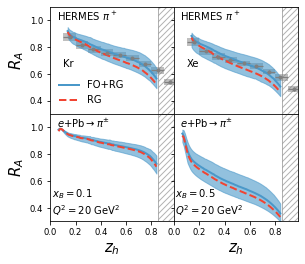

In [525]:

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(4,3.5), sharex=True, sharey=True)
def plotE(GG,c,ax,mfc='none'):
    z,zl,zh,RA,stat,_,sys,_ = np.loadtxt("../TMDPDF/HERMES/e{}-pi+.dat".format(GG), skiprows=12,delimiter=',').T
    ax.errorbar(z,RA,xerr=[z-zl, zh-z], yerr=stat, fmt='.', lw=1.2,
                color=c)
    for xl, xh, yl, yh in zip(zl, zh, RA-sys, RA+sys):
        ax.fill_between([xl,xh],[yl,yl],[yh,yh],edgecolor='none',facecolor=c, alpha=.5)

ccr, ccg, ccb = plt.cm.Reds(.6), plt.cm.Greens(.6), plt.cm.Blues(.6)


Ehermes = 12
zc = 0.85

for ax, nucl in zip(axes[0],['Kr','Xe']):
    ax.fill_between([zc,1.04],[0,0],[1.1,1.1], alpha=.6, facecolor='none',
                edgecolor='grey', hatch='////')
    plotE(nucl, 'grey', ax)
    
    # FO+RG vs RG
    ZH, A0, D0, A1, D1 = np.average([np.loadtxt("rho1/res-{}-Lp{}.dat".format(nucl, sl)) for sl in Lps],
                            weights=1-Lps**2, axis=0).T
    c = (ZH>.12) & (ZH/Shift<zc)
    ax.plot(ZH[c]/Shift, A1[c]/D1[c], '-', color=ccb, label='FO+RG', lw=2)
    ax.plot(ZH[c]/Shift, A0[c]/D0[c], '--', color=ccr, label='RG', lw=2)
    
    
    # FO+RG, vary rhoG
    ZH, _, _, AH, DH = np.average([np.loadtxt("rho1d5/res-{}-Lp{}.dat".format(nucl, sl)) for sl in Lps],
                            weights=1-Lps**2, axis=0).T
    ZH, _, _, AL, DL = np.average([np.loadtxt("rho0d67/res-{}-Lp{}.dat".format(nucl, sl)) for sl in Lps],
                            weights=1-Lps**2, axis=0).T
    ax.fill_between(ZH[c]/Shift, AL[c]/DL[c], AH[c]/DH[c], color=ccb, alpha=.6)
    
    ax.annotate(nucl, xy=(.1, .65), fontsize=10)
    ax.annotate(r"HERMES $\pi^+$",
            xy=(.05,1), fontsize=10)
axes[0,0].legend(loc="lower left",fontsize=10, framealpha=0)

for ax, x0, lx0 in zip(axes[1], [0.1, 0.5], ["0d1", "0d5"]):
    ax.fill_between([zc,1.04],[0,0],[1.1,1.1], alpha=.6, facecolor='none',
                edgecolor='grey', hatch='////')

    nu = 20.0/2/0.938/x0
    label=r"$x_B={}$".format(x0)+'\n'+r"$Q^2=20{{\rm~GeV}}^2$"
    ZH, A0, D0, A1, D1 = np.average([np.loadtxt("rho1/res-Pb-Qsq20-x{}-Lp{}.dat".format(lx0,sl)) 
                                     for sl in Lps], weights=1-Lps**2, axis=0).T
                        

    cut = (0.05<ZH) & (ZH/Shift<zc)
    ax.plot(ZH[cut]/Shift, A1[cut]/D1[cut], '-', color=ccb, alpha=1, lw=2)
    ax.plot(ZH[cut]/Shift, A0[cut]/D0[cut], '--', color=ccr, alpha=1, lw=2)
    ax.annotate(label, xy=(.01,.35), fontsize=10)
    
    # FO+RG, vary rhoG
    ZH, _, _, AH, DH = np.average([np.loadtxt("rho1d5/res-Pb-Qsq20-x{}-Lp{}.dat".format(lx0,sl)) 
                                     for sl in Lps], weights=1-Lps**2, axis=0).T
    ZH, _, _, AL, DL = np.average([np.loadtxt("rho0d67/res-Pb-Qsq20-x{}-Lp{}.dat".format(lx0,sl)) 
                                     for sl in Lps], weights=1-Lps**2, axis=0).T
    ax.fill_between(ZH[cut]/Shift, AL[cut]/DL[cut], AH[cut]/DH[cut], color=ccb, alpha=.6)

    ax.annotate(r"$e$+Pb$\rightarrow\pi^{\pm}$",
                xy=(.05,1), fontsize=10)

ax.set_xlim(0,.98)
ax.set_ylim(.3,1.1)
axes[1,0].set_xlabel("$z_h$", fontsize=15)
axes[1,1].set_xlabel("$z_h$", fontsize=15)
for ax in axes.T[0]:
    ax.set_ylabel("$R_{A}$", fontsize=15)

for ax in axes.flatten():
    ax.set_xticks([.0, .2, .4, .6, .8], )
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    #ax.tick_params(axis='both', which='minor', labelsize=8)

plt.tight_layout(True)

plt.subplots_adjust(hspace=0, wspace=0.,left=.13, right=.99, bottom=.14, top=.99)


plt.savefig("RA-RG-fixed-order-22.png",dpi=400)

In [ ]:
print(Shift)
plt.figure(figsize=(4,3.))
def plotE(GG,c):
    z,zl,zh,RA,stat,_,sys,_ = np.loadtxt("../TMDPDF/HERMES/e{}-pi+.dat".format(GG), 
                                         skiprows=12,delimiter=',').T
    plt.errorbar(z,RA,xerr=[z-zl, zh-z], yerr=stat, fmt='D',color=c, label=r'$e{{\rm{}}}\rightarrow\pi^+$'.format(GG))


plotE('Xe','b')
ZH, A0, D0, A1, D1 = np.average([np.loadtxt("res-Xe-Lp{}.dat".format(sl)) for sl in Lps],
                        weights=1-Lps**2, axis=0).T
cut = ZH>.1
plt.plot(ZH[cut]/Shift, A1[cut]/D1[cut], 'b--', label='RG + Fixed order')
plt.plot(ZH[cut]/Shift, A0[cut]/D0[cut], 'b-', label='RG only')


plotE('Ne','r')
ZH, A0, D0, A1, D1 = np.average([np.loadtxt("res-Ne-Lp{}.dat".format(sl)) for sl in Lps],
                        weights=1-Lps**2, axis=0).T
cut = ZH>.1
plt.plot(ZH[cut]/Shift, A1[cut]/D1[cut], 'r--')
plt.plot(ZH[cut]/Shift, A0[cut]/D0[cut], 'r-')


Ehermes = 12
L1 = 1.16*131**0.33333333*5.076
T1 = -np.pi/9*rho*L1**2/2/Ehermes*4*np.pi/9*(1/np.log(np.max([5*E/L1/La2,m2/La2],axis=0))-1/np.log(m2/La2))
zc = 1-4*CF*CA*T1
plt.fill_between([zc,1.04],[0,0],[.6,.6], alpha=.4, color='b')


L1 = 1.16*20**0.33333333*5.076
T1 = -np.pi/9*rho*L1**2/2/Ehermes*4*np.pi/9*(1/np.log(np.max([5*E/L1/La2,m2/La2],axis=0))-1/np.log(m2/La2))
zc = 1-4*CF*CA*T1
plt.fill_between([zc,1.04],[0,0],[1,1], alpha=.6, facecolor='none', edgecolor='r', hatch='////')


plt.legend(fontsize=11, framealpha=0)
plt.xlim(0,1.0)
plt.ylim(.0,1.05)
plt.xlabel("$z_h$", fontsize=15)
plt.ylabel("$R_{A}$", fontsize=15)


#plt.title("Not using exact the same kinematic cuts", fontsize=15)
plt.tight_layout(True)
plt.savefig("RA-HERMES.png",dpi=300)